In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6696,4566-NECEV,Male,0,No,No,5,Yes,Yes,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,No,Electronic check,96.55,500.1,No
5572,4654-ULTTN,Male,0,Yes,No,70,Yes,Yes,DSL,Yes,...,Yes,Yes,No,Yes,Two year,Yes,Credit card (automatic),74.80,5315.8,No
95,8637-XJIVR,Female,0,No,No,12,Yes,Yes,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,78.95,927.35,Yes
5613,3913-FCUUW,Female,0,Yes,Yes,72,Yes,Yes,DSL,Yes,...,Yes,Yes,No,No,Two year,Yes,Bank transfer (automatic),70.45,5165.7,No
4093,2476-YGEFM,Female,0,No,No,29,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),76.00,2215.25,No


In [3]:
df.drop('customerID',axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df.TotalCharges.values


array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [5]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [6]:
pd.to_numeric(df.TotalCharges, errors = 'coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [9]:
df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [11]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [12]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

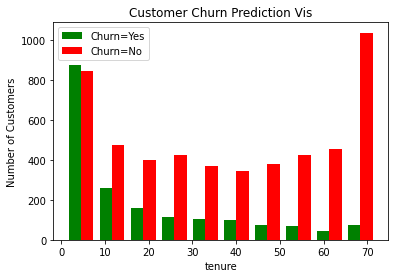

In [13]:
tenure_churn_no = df1[df1.Churn == 'No'].tenure
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure

plt.xlabel('tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Vis')

plt.hist([tenure_churn_yes, tenure_churn_no], color = ['green','red'], label=['Churn=Yes','Churn=No'])
plt.legend()

In [14]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column}: {df[column].unique()}')

In [15]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [16]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No', inplace=True)

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [17]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [18]:
yes_no_columns = ['Partner','Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling' ,'Churn']

for i in yes_no_columns:
    df1[i].replace({'Yes': 1, 'No':0}, inplace=True)

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\pandas\core\series.py:4575: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [19]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [20]:
for i in df1:
    print(f'{i}:{df1[i].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [21]:
df1['gender'].replace({'Female':1, 'Male':0}, inplace=True)

In [22]:
for i in df1:
    print(f'{i}:{df1[i].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [23]:
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract', 'PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [24]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6653,1,0,0,0,28,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
3563,0,1,0,0,30,1,1,1,0,0,...,0,1,0,1,0,0,0,1,0,0
1950,0,0,1,0,65,1,1,0,1,0,...,0,1,0,1,0,0,1,0,0,0
1440,0,0,1,1,8,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
1898,1,1,0,0,5,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [25]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [26]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [27]:
df2['MonthlyCharges'].sample(5)

4775    0.806468
3618    0.358209
2520    0.661692
5293    0.615423
3884    0.702488
Name: MonthlyCharges, dtype: float64

In [28]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=5)

In [30]:
X_train.shape


(5625, 26)

In [31]:
y_train.shape

(5625,)

In [32]:
X_test.shape

(1407, 26)

In [33]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation = 'relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 4ms/step - loss: 0.5050 - accuracy: 0.7543
Epoch 2/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4299 - accuracy: 0.7947
Epoch 3/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4192 - accuracy: 0.8000
Epoch 4/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4145 - accuracy: 0.8016
Epoch 5/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4113 - accuracy: 0.8060
Epoch 6/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4097 - accuracy: 0.8082
Epoch 7/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4081 - accuracy: 0.8098
Epoch 8/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4070 - accuracy: 0.8075
Epoch 9/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4056 - accuracy: 0.8130
Epoch 10/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4051 - accura

176/176 [==============================] - 1s 4ms/step - loss: 0.3840 - accuracy: 0.8224
Epoch 82/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3837 - accuracy: 0.8215
Epoch 83/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3836 - accuracy: 0.8185
Epoch 84/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3830 - accuracy: 0.8215
Epoch 85/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3830 - accuracy: 0.8219
Epoch 86/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3835 - accuracy: 0.8203
Epoch 87/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3830 - accuracy: 0.8206
Epoch 88/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3826 - accuracy: 0.8208
Epoch 89/100
176/176 [==============================] - 1s 7ms/step - loss: 0.3829 - accuracy: 0.8222
Epoch 90/100
176/176 [==============================] - 1s 6ms/step - loss: 0.3823 - accuracy: 

In [34]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 4ms/step - loss: 0.4527 - accuracy: 0.7882


[0.4527060389518738, 0.7882018685340881]

In [35]:
yp = model.predict(X_test)
yp[:5]

array([[0.3380098 ],
       [0.5205508 ],
       [0.01349885],
       [0.7973188 ],
       [0.54942524]], dtype=float32)

In [36]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [37]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [38]:
y_pred[:10]

[0, 1, 0, 1, 1, 1, 0, 1, 0, 0]

In [39]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       999
           1       0.66      0.56      0.61       408

    accuracy                           0.79      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.78      0.79      0.78      1407



Text(69.0, 0.5, 'Truth')

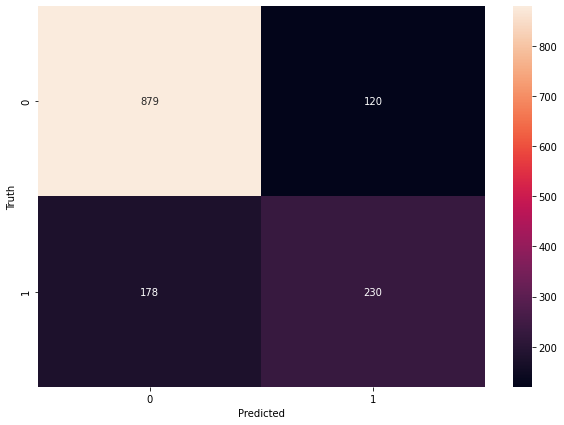

In [40]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [41]:
y_test.value_counts()

0    999
1    408
Name: Churn, dtype: int64

In [42]:
X_train.shape

(5625, 26)

In [43]:
X_test.shape

(1407, 26)

In [44]:
count_class_0, count_class_1 = df1.Churn.value_counts()

df_class_0 = df2[df2['Churn']==0]
df_class_1 = df2[df2['Churn']==1]


In [45]:
df_class_0.shape

(5163, 27)

In [46]:
df_class_1.shape

(1869, 27)

In [47]:
count_class_0, count_class_1

(5163, 1869)

In [48]:
df_class_0_under = df_class_0.sample(count_class_1)

In [49]:
df_class_0_under.shape

(1869, 27)

In [50]:
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)
df_test_under.shape

(3738, 27)

In [51]:
df_test_under.Churn.value_counts()

1    1869
0    1869
Name: Churn, dtype: int64

In [52]:
X = df_test_under.drop('Churn', axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=15, stratify=y)

In [53]:
y_train.value_counts()

1    1495
0    1495
Name: Churn, dtype: int64

Method 2 OVERSAMPLING

In [55]:
count_class_0, count_class_1

(5163, 1869)

In [67]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis = 0)
print(df_test_over.Churn.value_counts())

1    5163
0    5163
Name: Churn, dtype: int64


In [68]:
X = df_test_under.drop('Churn', axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=15, stratify=y)

# SMOTE - Oversampling by creating synthetic examples 

In [72]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [76]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [93]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X,y)

y_sm.value_counts()


1    5163
0    5163
Name: Churn, dtype: int64

In [94]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X_sm,y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [95]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

# Use of Ensemble with Undersampling

In [96]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [97]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=15, stratify=y)

In [101]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [103]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [104]:
df3_class0 = df3[df3.Churn == 0]
df3_class1 = df3[df3.Churn == 1]